# <center>CSIS 452 - Applied Machine Learning</center>
## Assignment 5 - due: 04/23/2020
In this assignment you will develop a Multinomial Logistic Regression model for handwritten digit recognition using MNIST data set. 

Enter your name as a comment in the cell below:

Developer: Brady Lange

Date: 04/16/2020

Course: Applied Machine Learning (CSIS 452)

Description: Multinomial Logistic Regression on the MNIST dataset to predict the handwritten digit.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


The following function can be used to display a random sample of images along with targets and predicted class.

In [1]:
def display_a_random_sample_of_images(grid_size, images, targets, predictions = np.array([]), title = "images"):
    """ 
    Displayes a random sample of images with the corresponding targets
    
    
    Argument:
        grid_size -- size of subplot will be grid_sizeXgrid_size.
        images -- an array of images 32x32  (num_images x 8 x 8)
        targets -- an array of class values (num_images x 1) containing class values 
             between 0 and 9  
        predictions -- an array of predicted class values (nume_images X 1) containig predicted
             class values between 0 and 9
    Returns:
        None
    """
    class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] 
    #reshape the images for display
    
    fig, axes1 = plt.subplots(grid_size, grid_size, figsize = (5, 5))
    fig.suptitle(title, fontsize = "x-small")
    plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = 0.8, hspace = 0.8)
    
    for j in range(grid_size):
        for k in range(grid_size):
            i = np.random.choice(range(len(images)))
            axes1[j][k].set_axis_off()
            if predictions.size > 0:
                axes1[j][k].set_title(class_names[targets[i]] + "," + class_names[predictions[i]])
            else:
                axes1[j][k].set_title(class_names[targets[i]])
            axes1[j][k].title.set_fontsize(8)
            axes1[j][k].imshow(images[i, :, :], cmap = matplotlib.cm.binary, interpolation = "nearest")

NameError: name 'np' is not defined

Let's first load the data set from keras datasets.  You will need to look at Keras datasets documentation, learn about the MNIST data set and develop the code below.

In [3]:
def load_digits():
    """
    Load and returns images and targets from the sklearn digits dataset.  
    
    Arguments: None
    
    #Returns: 
        images -- an array of digit images (num_imagesX8x8) 
               -- images are in normlaized form
        target_classes -- an array of class values (num_imagesX1) containing 
        class values between 0 and 9

    """    

    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    return X_train, y_train, X_test, y_test

Now, let's load the images and display a random sample of 9 images in a 3-by-3 grid along with their corresponding target class using the functions developed above.

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


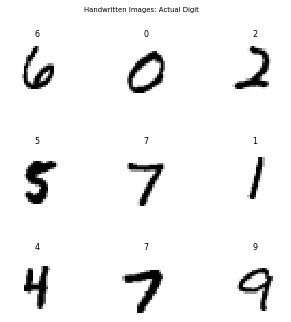

In [4]:
X_train, y_train, X_test, y_test = load_digits()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
np.random.seed(2)
display_a_random_sample_of_images(3, X_train, y_train, 
                                  title = "Handwritten Images: Actual Digit")
plt.show()

## Expected output:
<img src="Figure1.png" width="20%" height="20%" align="left"> <br>


Next, we will reshape the train images from 60000 x 28 x 28 to 60000 x 784 and test images from 10000 x 28 x 28 to 10000 x 784.  This way, each image will be represented with a vector of 784 pixel values.  We will also reshape the targets to a rank-2 vector.  

In [5]:
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
y_train_flat = y_train.reshape(y_train.shape[0], 1)
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
y_test_flat = y_test.reshape(y_test.shape[0], 1)

print(X_train_flat.shape, y_train_flat.shape, X_test_flat.shape, y_test_flat.shape)

(60000, 784) (60000, 1) (10000, 784) (10000, 1)


## Expected output:
(60000, 784) (60000, 1) (10000, 784) (10000, 1)


Now let's train a Logistic Regression model using the flattened data.  You do not need to normalize the features as pixel values are in the same range (0 to 255). NOTE: Ignore the warning as the data is non-linear and we are using a liner model to fit it.

In [6]:
softmax_reg = LogisticRegression(solver = "lbfgs", multi_class = "multinomial")
softmax_reg.fit(X_train_flat, np.squeeze(y_train_flat))

C:\Users\brady\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now let's evaluate the model on the training and test images.  First we will need to get the h values.

In [7]:
h_train = softmax_reg.predict(X_train_flat)
h_test = softmax_reg.predict(X_test_flat)

Next, we will measure the model performance on the training set and test set using Confusion Matrix, Average Accuracy, Average Precision, Average Recall and Average F1-Score. 

In [8]:
cf_train = confusion_matrix(y_train_flat, h_train)
ca_train = np.mean(accuracy_score(y_train_flat, h_train))
ps_train = np.mean(precision_score(y_train_flat, h_train, average = None)) 
rs_train = np.mean(recall_score(y_train_flat, h_train, average = None))
f1_train = np.mean(f1_score(y_train_flat, h_train, average = None))
print("Training Performance:")
print("Average Train Confusion Matrix:\n", cf_train)
print("Average Train Accuracy: {0:0.2%}".format(ca_train))
print("Average Train Precision {0:0.2%}".format(ps_train))
print("Average Train Recall: {0:0.2%}".format(rs_train))
print("Average Train F1: {0:0.2%}".format(f1_train))

cf_test = confusion_matrix(y_test_flat, h_test)
ca_test = np.mean(accuracy_score(y_test_flat, h_test))
ps_test = np.mean(precision_score(y_test_flat, h_test, average = None))
rs_test = np.mean(recall_score(y_test_flat, h_test, average = None))
f1_test = np.mean(f1_score(y_test_flat, h_test, average = None))
print("Testing Performance:")
print("Average Test Confusion Matrix:\n", cf_test)
print("Average Test Accuracy: {0:0.2%}".format(ca_test))
print("Average Test Precision {0:0.2%}".format(ps_test))
print("Average Test Recall {0:0.2%}".format(rs_test))
print("Average Test F1: {0:0.2%}".format(f1_test))

Training Performance:
Average Train Confusion Matrix:
 [[5764    0   15    9   14   36   33   10   38    4]
 [   1 6584   32   19    6   20    3   10   55   12]
 [  28   47 5445   89   61   20   56   51  140   21]
 [  17   23  118 5582    6  162   14   50  119   40]
 [  13   22   23    9 5491    8   48   15   42  171]
 [  57   18   40  161   48 4793   82   15  160   47]
 [  34    9   40    0   35   58 5713    4   21    4]
 [  11   20   58   28   42    8    4 5896   20  178]
 [  27   93   55  122   19  136   36   18 5293   52]
 [  21   22   14   70  129   33    3  138   45 5474]]
Average Train Accuracy: 93.39%
Average Train Precision 93.32%
Average Train Recall: 93.29%
Average Train F1: 93.30%
Testing Performance:
Average Test Confusion Matrix:
 [[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0  

## Expected output:
<img src="Figure2.png" width="40%" height="40%" align="left"> <br>


Finally, let's examine a set of images and compare their predicted and actual labels.

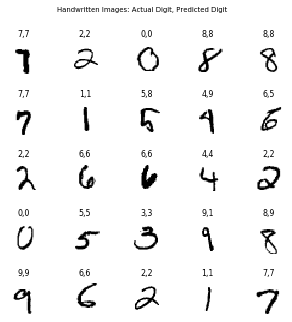

In [9]:
np.random.seed(5)
display_a_random_sample_of_images(5, X_test, y_test, predictions = h_test, 
                                  title = "Handwritten Images: Actual Digit, Predicted Digit")
plt.show()

## Expected output:
<img src="Figure3.png" width="30%" height="30%" align="left"> <br>


For each misclassified image, provide a once scentence description of why you think it was missclassified

### **Handwritten Image Misclassification:** ###
#### *Actual Digit, Predicted Digit* ####
##### ***5, 8*** #####
The digit 5 is closed on the bottom and has the potential to close on the top which can be mistaked as a digit 8. A digit 8 is very close in segment properties as a digit 5, so this is a reasonable error.

##### ***4, 9*** #####
The digit 4 is nearly closed at the top and has a vertical line makign it seem it is a digit 9. A digit 9 is very close in segment properties as a digit 4, so this is a reasonable error.

##### ***6, 5*** #####
The digit 6 (although closed at the bottom) has a sharp line at the top that would make it seem to have a digit 5 property. A digit 5 is very close in segment properties as a digit 6, so this is a reasonable error.

##### ***9, 1*** #####
The digit 9 is closed at the top with a very small circle (nearly the size of the vertical line) that would make it seem more similar to a digit 1. A digit 1 is close in segment properties as a digit 9, so this is a reasonable error.

##### ***8, 9*** #####
The digit 8 does appear to be a clear cut digit 8, but I can see the pixels at the bottom appear to be less frequent and more frequent on the top, hence the algorithm probably mistaked it as not being closed at the bottom and appearing to be a digit 9 instead. A digit 8 has two loops and a digit 9 has one loop and are very close in segment properties, so this is a reasonble error.